Sentiment Analysis has been a very popular task since the dawn of Natural Language Processing (NLP). It belongs to a subtask or application of text classification, where sentiments or subjective information from different texts are extracted and identified. Today, many businesses around the world use sentiment analysis to understand more deeply their customers and clients by analyzing sentiments across different target groups. It also has wide applications in different sources of information, including product reviews, online social media, survey feedback, etc.

In [1]:
# required libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB

from xgboost import XGBClassifier

from transformers import pipeline

import warnings
warnings.filterwarnings('ignore')

#NLTK package is already installed
#But got errors while impelementing tokenization and Lemmetization

#Tokenization
nltk.download('punkt')

#Lemmitization
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
# load dataset 
df = pd.read_csv('D:\\Trimester 2\\Final Project\\Reviews.csv')

#First 5 rows of the dataset
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [28]:
#Structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


# Exploratory Data Analysis

Since we are interested in sentiment analysis, we will only use the features 'Text' and 'Score'

In [31]:
#Select only the features required for analysis
data = df[["Text","Score"]]

#first 5 rows of the dataset
data.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [33]:
#Structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    568454 non-null  object
 1   Score   568454 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [42]:
#remove missing data if any 
data.dropna(inplace=True)
data.isnull().sum()

Text     0
Score    0
dtype: int64

In [85]:
#Check random reviews
import random
random.seed(20204749) #Adding seed to reproduce the same result
randomlist = []

#find 5 random numbers within the highest number of rows
for i in range(0,5):
    n = random.randint(1,568454 )
    randomlist.append(n)
print(randomlist)

#Print the reviews and it's corresponding rating
#5 random results are obtained
for i in range(0,5):
    print("Review:","\n", data.loc[randomlist[i]][0]) #print review
    
    print("\n") # create a new line for better readability
    
    print("Rating:","\n", data.loc[randomlist[i]][1]) #print the corresponding rating of above review
    
    print(100*'#') # Adding '#' to sperate one review from other

[285834, 470098, 468565, 493467, 154437]
Review: 
 I have only purchased the Haribo Gold Bears in the past, but I decided to give the Frogs a try. Boy was I delighted. The Bears are filled with flavor, and these Frogs also have the same fruitful flavor, only with a layer of the white, marshmallow-like gummi on the belly side of the Frogs. If you have only bought the Bears because you know you can't go wrong with them, you may like something different but not too different like these Mini Frogs by Haribo.


Rating: 
 5
####################################################################################################
Review: 
 My little yourkie absolutely loves these treats. He chews all the chicken off first, which I think helps keep his teeth clean, and then goes to work on the rawhide.<br /><br />GREAT product, but the packaging wasn't too great. The bones were falling out when I got them... a little concerning.


Rating: 
 5
#########################################################

In [87]:
#Descriptive Statistics of the dataset
data.describe()

,Score
count,568454.000000
mean,4.183199
std,1.310436
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [90]:
# distribution of rating
data['Score'].value_counts().sort_index(ascending=False)

5    363122
4     80655
3     42640
2     29769
1     52268
Name: Score, dtype: int64

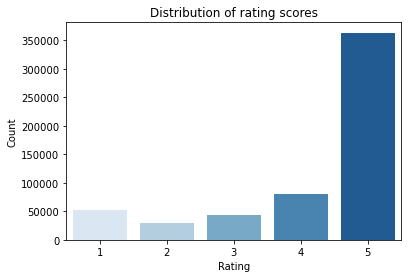

In [93]:
# distribution of rating
sns.countplot(data['Score'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

There is a huge imbalnce in the data to the high rate classes this may affect the prediction of NLP model.


In [95]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['Score'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,Text,Score,sentiment_score,sentiment
0,I have bought several of the Vitality canned d...,5,1,POSITIVE
1,Product arrived labeled as Jumbo Salted Peanut...,1,0,NEGATIVE
2,This is a confection that has been around a fe...,4,1,POSITIVE
3,If you are looking for the secret ingredient i...,2,0,NEGATIVE
4,Great taffy at a great price. There was a wid...,5,1,POSITIVE


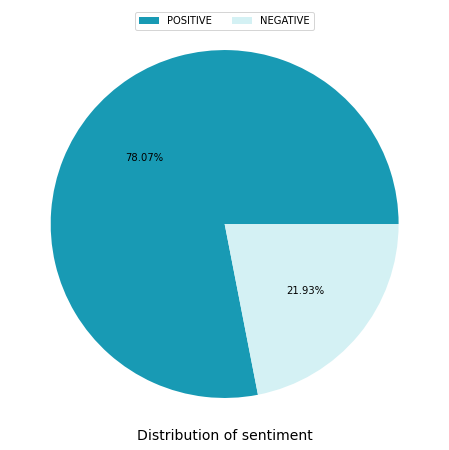

In [96]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

Most used words

In [97]:
# get all used words 
all_words = pd.Series(' '.join(data['Text']).split())

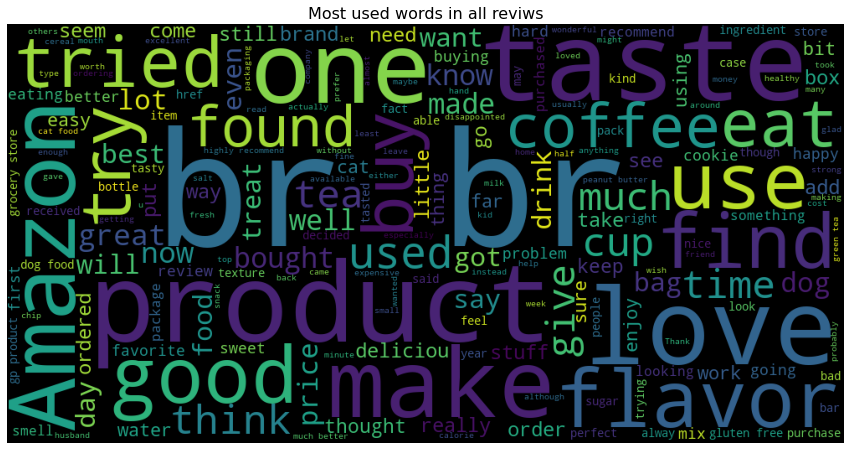

In [99]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

Poistive Reviews

In [100]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['Text']).split())

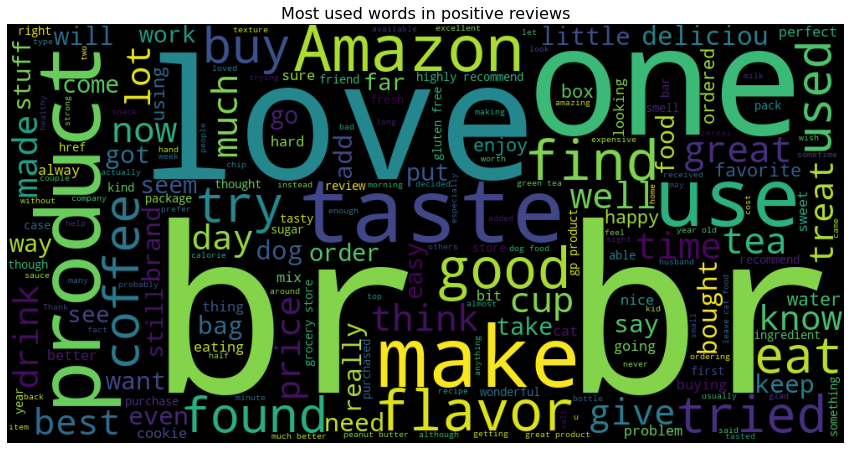

In [101]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

Negative Review

In [103]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['Text']).split())

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

### Text Processing

**1. Clean Text**  
We will go over some simple techniques to clean and prepare text data for modeling with machine learning.

In [112]:
def clean_Text(Text:str):
    """ Return cleaned Text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: Text (str)    
        output: cleaned Text (str)
    """
    Text = str(Text)
    
    Text = Text.lower()
    Text = Text.strip()
    
    Text = re.sub(' \d+', ' ', Text)
    Text = re.compile('<.*?>').sub('', Text)
    Text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', Text)
    Text = re.sub('\s+', ' ', Text)
    
    Text = Text.strip()
    
    return Text

In [114]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
clean_Text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'this is a message to be cleaned it may involve some things like adjacent spaces and tabs'

**2. Remove Stopwords**    
There can be some words in our sentences that occur very frequently and don't contribute too much to the overall meaning of the sentences. We usually have a list of these words and remove them from each our sentences. For example: "a", "an", "the", "this", "that", "is", "it", "to", "and" in this example.

In [116]:
def remove_stopwords(Text:str):
    """ Remove stopwords from Text:
        ------
        input: Text (str)    
        output: cleaned Text (str)
    """
    Text = str(Text)
    filtered_sentence = []

    # Stop word lists can be adjusted for your problem
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(Text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    Text = " ".join(filtered_sentence)
    
    return Text

In [146]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_Text(text)

remove_stopwords(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be cleaned may involve some things like adjacent spaces tabs'

**3. Stemming**  
Stemming is a rule-based system to convert words into their root form. It removes suffixes from words. This helps us enhace similarities (if any) between sentences.

In [125]:
def stemm_text(text:str):
    """ Stemm text:
    ------
    input: text (str)    
    output: Stemmed text (str)
    """
    text = str(text)
    # Initialize the stemmer
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        # Stem the word/token
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)
    
    return text

In [127]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_Text(text)
text = remove_stopwords(text)
stemm_text(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'messag be clean may involv some thing like adjac space tab'

You can see above that stemming operation is NOT perfect. We have mistakes such as "messag", "involv", "adjac". It is a rule based method that sometimes mistakely remove suffixes from words. Nevertheless, it runs fast.

**4. Lemmatization**  
If we are not satisfied with the result of stemming, we can use the Lemmatization instead. It usually requires more work, but gives better results. As mentioned in the class, lemmatization needs to know the correct word position tags such as "noun", "verb", "adjective", etc. and we will use another NLTK function to feed this information to the lemmatizer.

In [129]:
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [130]:
def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)    
    output: lemmatized text (str)
    """
    text = str(text)
    
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text

In [136]:
# test
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_Text(text)
text = remove_stopwords(text)
# text = stemm_text(text)
lemmatize(text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  26 adjacent spaces and tabs     .   



'message be clean may involve some thing like adjacent space tabs'

This looks better than the stemming result.

Apply text processing functions

It will take around 110 minutes for the test processing function to clean, remove stopwords and lemmatize the data

In [138]:
# clean text
data['Text'] = data['Text'].apply(clean_Text)
# remove stopwords
data['Text'] = data['Text'].apply(remove_stopwords)
# lemmatize
data['Text'] = data['Text'].apply(lemmatize)

In [153]:
# check some processed reviews
import random

i = random.choice(range(len(data)))

print(f"Original review: \n{data['Text'].iloc[i]}\n")
print(f"Processed review: \n{data['Text'].iloc[i]}") 

Original review: 
length 13 minsthe izze blackberry delicious not only good replacement for those who don t want drink soda s great substitute for those of u who be simply look for cool tasty beverage not too strong but still quite flavorful there isn t lot of carbonation but enough give nice little bite blackberry izze isn t just blackberry juice however s blend with white grape apple lemon raspberry along with blackberry subtle tasty even healthy i will be buy these regularly especially throughout summer

Processed review: 
length 13 minsthe izze blackberry delicious not only good replacement for those who don t want drink soda s great substitute for those of u who be simply look for cool tasty beverage not too strong but still quite flavorful there isn t lot of carbonation but enough give nice little bite blackberry izze isn t just blackberry juice however s blend with white grape apple lemon raspberry along with blackberry subtle tasty even healthy i will be buy these regularly esp

In [147]:
# export cleaned data to csv
data.to_csv('cleaned_data.csv', index=False)

In [2]:
data = pd.read_csv('cleaned_data.csv')
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Text             568454 non-null  object
 1   Score            568454 non-null  int64 
 2   sentiment_score  568454 non-null  int64 
 3   sentiment        568454 non-null  object
dtypes: int64(2), object(2)
memory usage: 262.9 MB


In [4]:
data[data['Text'].isnull()]

,Text,Score,sentiment_score,sentiment


In [4]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 0 to 568453
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Text             568454 non-null  object
 1   Score            568454 non-null  int64 
 2   sentiment_score  568454 non-null  int64 
 3   sentiment        568454 non-null  object
dtypes: int64(2), object(2)
memory usage: 21.7+ MB


## Feature Engineering and Selection

In [3]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['Text'])
features = vectorizer.transform(data['Text'])

features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.09137839, 0.        ,
        0.21936521],
       ...,
       [0.        , 0.        , 0.        , ..., 0.21927786, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.19099738,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names()).astype(np.float16)
# tf_idf.drop('50', axis=1, inplace=True)
tf_idf.head()
tf_idf.info(memory_usage='deep')

MemoryError: Unable to allocate 2.96 GiB for an array with shape (397917800,) and data type float64

In [31]:
#Convert into Sparse matrix to reduce the memory of storage

#tf_idf = tf_idf



AttributeError: 'NoneType' object has no attribute 'astype'

NoneType

Splitting Dataset into Train and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.2, random_state=42)

In [36]:
X_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113691 entries, 165256 to 32333
Columns: 700 entries, able to yummy
dtypes: float16(700)
memory usage: 152.7 MB


In [8]:
print (f'Train set shape\t:{X_train.shape}\nTest set shape\t:{X_test.shape}')

Train set shape	:(454763, 700)
Test set shape	:(113691, 700)


In [37]:
yy = pd.DataFrame(y_train)
train_data = pd.concat([X_train, yy],axis=1)
train_data.head()

,able,about,absolutely,actually,add,after,aftertaste,again,ago,all,...,wouldn,write,wrong,year,yes,yet,you,your,yummy,sentiment_score
251349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0
523262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1
224543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.15979,0.0,0.0,1
291632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258545,0.0,0.19104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1
37385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1


Oversampling


In [38]:
train_data['sentiment_score'].value_counts()

1    354752
0    100011
Name: sentiment_score, dtype: int64

41942

In [39]:
target_count = train_data['sentiment_score'].value_counts()
negative_class = train_data[train_data['sentiment_score'] == 0]
positive_class = train_data[train_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,able,about,absolutely,actually,add,after,aftertaste,again,ago,all,...,wouldn,write,wrong,year,yes,yet,you,your,yummy,sentiment_score
299098,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.179565,0.079651,0.000000,0.0,0
543000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1
177627,0.0,0.0,0.0,0.0,0.0,0.0,0.14209,0.000000,0.0,0.138916,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.057526,0.000000,0.0,0
490674,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.202759,0.089966,0.000000,0.0,1
13369,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.074524,0.0,0.055084,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.068542,0.0,1


In [40]:
df_train_over.dropna(inplace=True)

In [42]:
df_train_over['sentiment_score'].value_counts()

0    354752
1    354752
Name: sentiment_score, dtype: int64

In [48]:
X_train = df_train_over.iloc[:,:-1].astype('float8')
y_train = df_train_over['sentiment_score'].astype('category')

MemoryError: Unable to allocate 947. MiB for an array with shape (700, 709504) and data type float16

In [45]:
X_train.info

<bound method DataFrame.info of         able  about  absolutely  actually  add  after  aftertaste     again  \
299098   0.0    0.0         0.0       0.0  0.0    0.0     0.00000  0.000000   
543000   0.0    0.0         0.0       0.0  0.0    0.0     0.00000  0.000000   
177627   0.0    0.0         0.0       0.0  0.0    0.0     0.14209  0.000000   
490674   0.0    0.0         0.0       0.0  0.0    0.0     0.00000  0.000000   
13369    0.0    0.0         0.0       0.0  0.0    0.0     0.00000  0.074524   
...      ...    ...         ...       ...  ...    ...         ...       ...   
566508   0.0    0.0         0.0       0.0  0.0    0.0     0.00000  0.000000   
55627    0.0    0.0         0.0       0.0  0.0    0.0     0.00000  0.000000   
542704   0.0    0.0         0.0       0.0  0.0    0.0     0.00000  0.000000   
253435   0.0    0.0         0.0       0.0  0.0    0.0     0.00000  0.000000   
343381   0.0    0.0         0.0       0.0  0.0    0.0     0.00000  0.000000   

        ago       a

## Models

In [ ]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))

    '''
    cmapGR = LinearSegmentedColormap.from_list(
        name='test', 
        colors=['red','green']
    )
    '''
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

#### Naive Bayes

In [ ]:
modeling(MultinomialNB())

##### XGBOOST

In [ ]:
modeling(XGBClassifier());

##### HuggingFace Transformer

Transformers library by Huggingface. We will be using pretrained transformers rather than fine-tuning our own, so a low setup cost is needed.

In [139]:
# Build sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]